# Title: Maximizing Customer Retention: A Churn Prediction Analysis The for Vodafone Group

## Project description

Customer attrition is a prevalent problem for many businesses, resulting in large financial losses. We intend to investigate customer churn or attrition in this project, which refers to the percentage of consumers that discontinue using a company's product or service within a specified time frame. Understanding the primary causes of customer churn can assist businesses in developing effective retention strategies to reduce customer attrition and boost revenue.

This project's dataset includes information about users' demographics, service usage, and billing information. We will use this dataset to conduct an exploratory data analysis in order to find patterns and trends linked to customer attrition. We will next use machine learning techniques to create a predictive model that will estimate the likelihood of a customer leaving the firm.

__Our project's objectives are to:__

1.Investigate and display the data to uncover patterns and trends in customer attrition.

2.Using machine learning methods, create a predictive model to forecast the possibility of client attrition.

3.Determine the major churn indicators, such as client demographics, service usage, and billing information.

4.Create retention techniques to assist reduce client turnover while increasing customer loyalty.

5.Based on the model's results, assess the success of retention efforts and make recommendations for changes.

The project's outcome will provide valuable insights for Vodafone to understand customer churn and implement effective retention strategies to reduce customer attrition and increase revenue.


## Hypothesis 

   
Null hypothesis:
There is no significant relationship between the dependents and their likelihood to churn.

Alternative hypothesis:
There is a significant relationship between the dependents and their likelihood to churn.    

## Questions 

1. Which age group (Senior Citizen Column) paid the highest monthly charges?
2. Which gender has the highest count of churn ? 
3. Which Internet Service is patronized the most?
4. How much total charge and monthly charge revenue does churners generate?
5. Which payment method is the most popular?

# 1. Library Installation

In [1]:

##!pip install imblearn ##for handling imbalanace data
##! pip install phik ##for our phik correlation
##!pip install lime

# 2. Library Importation

In [2]:

##Data Handling

import pandas as pd
import numpy as np

##Visualization Libraries 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns 
%matplotlib inline
import random
import plotly.offline as offline
offline.init_notebook_mode(connected=True) # Configure Plotly to run offline


# Feature Processing libraries

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
import phik

#Algorithms libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

##pipelines and transformers 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer 
from imblearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

##handling imbalance datasets
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

##hyperparameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

##for hypothesis testing 

from scipy.stats import chi2_contingency

##model evaluation:
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# Other packages
import os
import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# 3. Data Loading

In [3]:
path=r"C:\Users\DAVID\Career_Accelerator_LP3-Classifcation\LP2_Telco-churn-last-2000.csv"
df= pd.read_csv(path)
#df =pd.read_csv("datahub\LP3\Telco-Customer-Churn.csv")

In [4]:
##taking a look at our dataset
df

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     5600-PDUJF    Male              0      No         No       6   
1     8292-TYSPY    Male              0      No         No      19   
2     0567-XRHCU  Female              0     Yes        Yes      69   
3     1867-BDVFH    Male              0     Yes        Yes      11   
4     2067-QYTCF  Female              0     Yes         No      64   
...          ...     ...            ...     ...        ...     ...   
2038  6840-RESVB    Male              0     Yes        Yes      24   
2039  2234-XADUH  Female              0     Yes        Yes      72   
2040  4801-JZAZL  Female              0     Yes        Yes      11   
2041  8361-LTMKD    Male              1     Yes         No       4   
2042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0             Yes                No             DSL             No  ...   
1             Yes                No             DSL             No  ...   
2              No  No phone service             DSL            Yes  ...   
3             Yes               Yes     Fiber optic             No  ...   
4             Yes               Yes     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
2038          Yes               Yes             DSL            Yes  ...   
2039          Yes               Yes     Fiber optic             No  ...   
2040           No  No phone service             DSL            Yes  ...   
2041          Yes               Yes     Fiber optic             No  ...   
2042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No         Yes          No              No  Month-to-month   
1                 Yes         Yes          No              No  Month-to-month   
2                 Yes          No          No             Yes        Two year   
3                  No          No          No              No  Month-to-month   
4                 Yes         Yes         Yes             Yes  Month-to-month   
...               ...         ...         ...             ...             ...   
2038              Yes         Yes         Yes             Yes        One year   
2039              Yes          No         Yes             Yes        One year   
2040               No          No          No              No  Month-to-month   
2041               No          No          No              No  Month-to-month   
2042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes    Credit card (automatic)          49.50         312.7   
1                 Yes    Credit card (automatic)          55.00        1046.5   
2                 Yes    Credit card (automatic)          43.95        2960.1   
3                 Yes           Electronic check          74.35         834.2   
4                 Yes           Electronic check         111.15        6953.4   
...               ...                        ...            ...           ...   
2038              Yes               Mailed check          84.80        1990.5   
2039              Yes    Credit card (automatic)         103.20        7362.9   
2040              Yes           Electronic check          29.60        346.45   
2041              Yes               Mailed check          74.40         306.6   
2042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1      Yes  
2       No  
3      Yes  
4       No  
...    ...  
2038    No  
2039    No  
2040    No  
2041   Yes  
2042    No  

[2043 rows x 21 columns]

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2038    False
2039    False
2040    False
2041    False
2042    False
Length: 2043, dtype: bool

# 4.Exploratory Data Analysis

## 4.1 Dataset Overview

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        2043 non-null   object 
 1   gender            2043 non-null   object 
 2   SeniorCitizen     2043 non-null   int64  
 3   Partner           2043 non-null   object 
 4   Dependents        2043 non-null   object 
 5   tenure            2043 non-null   int64  
 6   PhoneService      2043 non-null   object 
 7   MultipleLines     2043 non-null   object 
 8   InternetService   2043 non-null   object 
 9   OnlineSecurity    2043 non-null   object 
 10  OnlineBackup      2043 non-null   object 
 11  DeviceProtection  2043 non-null   object 
 12  TechSupport       2043 non-null   object 
 13  StreamingTV       2043 non-null   object 
 14  StreamingMovies   2043 non-null   object 
 15  Contract          2043 non-null   object 
 16  PaperlessBilling  2043 non-null   object 


### Notes of .info():

- Also, the TotalCharges column is an object data type, so we might want to check that. 
- There are no missing values
- We have a total of 7043 rows 
- We have a total of 21 columns 
- Our target variable has  yes/no attributes, therefore it is a binary classification problem

In [7]:
##let's create a copy to make  it easy for us to revert to our original dataframe if we make a mistake

df_copy= df.copy()

## 4.2 Converting the totalcharges column to a numerical variable

from .info(), we realized that the TotalCharge feature was an object data type; however, looking at it, it was an object, there we willbe chaning it to a numeric data type 

In [8]:
df_copy["TotalCharges"]= pd.to_numeric(df_copy["TotalCharges"], errors= "coerce")

In [9]:
##Let's check to see if there are any further missing values

df_copy.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
Churn               0
dtype: int64

there are 11 missing values so we will replace them with the mean of the TotalCharges column

In [10]:
df_copy["TotalCharges"].mean()

2303.214681372548

In [11]:
df_copy.fillna(value= df_copy["TotalCharges"].mean(), inplace= True)

In [12]:
##Let's check again for missing values
df_copy.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

#### Since there are no more missing values, we can proceed to use the df_copy for our analysis

In [13]:
##We will like to drop our ID column for both dataset since it composes of unique values

In [14]:
df= df.drop("customerID", axis= 1)

df_copy= df_copy.drop("customerID", axis= 1)

##Note we will be using the df_copy for our analysis and the df for our modeling 

In [15]:
### I am saving it so that I can use it for power BI:

df_copy.to_csv("Documents/Voda_churn.csv")

## 4.3 Univariate Analysis 

### 4.3.1 Describing The Data

In [16]:
df_copy.describe().transpose()

count         mean          std    min      25%      50%  \
SeniorCitizen   2043.0     0.168380     0.374295   0.00    0.000     0.00   
tenure          2043.0    32.649046    24.376248   0.00    9.000    30.00   
MonthlyCharges  2043.0    64.712555    29.970010  18.55   35.825    70.25   
TotalCharges    2043.0  2303.214681  2260.272736  18.85  435.350  1401.40   

                     75%      max  
SeniorCitizen      0.000     1.00  
tenure            55.000    72.00  
MonthlyCharges    89.625   118.35  
TotalCharges    3846.100  8670.10

####  __Key Notes After Using .Describe__:

__SeniorCitizen__: 

- This is a binary variable that indicates whether or not the customer is a senior citizen. 

- The output shows that out of 7,043 observations, 16.2% (or about 1,142) are senior citizens on average.

__tenure__: 

- This variable represents the number of months the customer has been with the company. 

- The output shows that on average, customers have been with the company for 32.4 months, but the standard deviation is quite large (24.6 months), indicating that there is a wide range of values for this variable. 

- Less than 75% of the customers spend less than 55 months with the company.

__MonthlyCharges__:  

- This variable represents the amount the customer pays each month for the company's services. 

- The output shows that on average, customers pay \\$64.76 per month, with 75 percent paying less than  \\$89.85. 

- Again, the standard deviation is quite large (30.1 dollars), indicating that there is a wide range of values for this variable as well. 


### 4.3.2 Checking distribution

array([[<AxesSubplot:title={'center':'SeniorCitizen'}>,
        <AxesSubplot:title={'center':'tenure'}>],
       [<AxesSubplot:title={'center':'MonthlyCharges'}>,
        <AxesSubplot:title={'center':'TotalCharges'}>]], dtype=object)

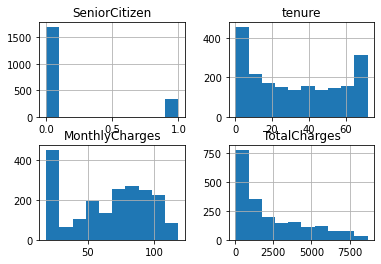

In [17]:
df_copy.hist()

In [18]:
df_copy.skew()

SeniorCitizen     1.773709
tenure            0.209694
MonthlyCharges   -0.215797
TotalCharges      0.948079
dtype: float64

__Observations__:

- Most customers for vodafone are non-senior citizens

- Most customers pay a monthly charge of 20 units 

- Most customers stay on the network for 0 months, and 70 months with those with a tenure of 0 being the most predominant customers 

### 4.3.3 checking for outliers 

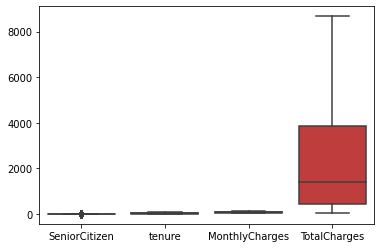

In [19]:
sns.boxplot(data=df_copy);

##### Observation:

- It can be seen that there are no outliers 

### 4.3.4 Univariate on the Churn Column

In [20]:
##the idea here is to check to see the ratio of our label variables 

In [21]:
##sns.countplot(x = df_copy["Churn"], data = df_copy)
##plt.title("Plot of Ratio of the Label Variables(Churn)")

fig_1 = px.pie(df_copy, names='Churn', title='Plot of Ratio of the Label Variables (Churn)')

offline.iplot(fig_1)

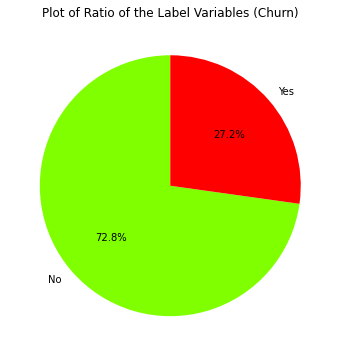

In [22]:
churn_count= df_copy.Churn.value_counts()
labels= churn_count.index.tolist()
size= churn_count.values.tolist()

plt.figure(figsize=(6, 6))
plt.pie(size, labels=labels, autopct='%1.1f%%', startangle=90, colors=['chartreuse', 'red'])
plt.title('Plot of Ratio of the Label Variables (Churn)')

plt.show()

#### Notes from exploring the Label Variable:

- We can see there is an imbalance in our dataset; therefore we will have to deal with that.

- 73% of the vodafone customers are still loyal

- 26.54% of the customers in the current dataset have left the company 

- Those who are still in the company are 2.77 times larger than those who have left 

In [23]:
df_copy.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1029
TotalCharges        1991
Churn                  2
dtype: int64

In [24]:
##We can see the tenure has 73 unique values, therefore it will be a good idea to bin it up to help make our analysis easier.

labels= ["{0} - {1}".format(i,i+11) for i in range (0, 73, 12) ]

df_copy["tenure_group"]= pd.cut(df_copy.tenure, range(1, 80, 12), right= False, labels=labels[:-1])

### 4.3.5 Seeing How each Categorical Column Variaes with Churn in terms of Count

In [25]:
for  col in df_copy.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis= 1):
    fig_2= px.histogram(df_copy, color= "Churn", x= col, title= f"Count of {col}, with respect to Churn", 
                      color_discrete_sequence=random.sample(["red", "pink", "blue", "green"], k=2))
    offline.iplot(fig_2)

#### Note:

Since there is an unequal number of customers in each of the attribute of each categorical feature, it will be a good idea to see how they vary based on percentages to give us a fair comparison 

### 4.3.6 Univariate of Each Categorical Column with Respect to Churn (in Percentage)

In [26]:
##in this code, we are checking to see the churn YES to NO churn percentage of each categorical feature

for col in df_copy.drop(["Churn", "tenure", "MonthlyCharges", "TotalCharges"], axis= 1):
    churn_by_col = df_copy.groupby(col)['Churn'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
    fig_3 = px.bar(churn_by_col, x=col, y='percent',color="Churn", text='percent', 
                   title= f"Percentage of: {col} with respect to Churn", 
                      color_discrete_sequence=random.sample(["chartreuse","darkblue","darkviolet","aqua",
                                                             "aquamarine", "beige", "burlywood"], k=2) )
    fig_3.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

    offline.iplot(fig_3)

### Monthly Charges vs Churn

In [27]:
fig= px.histogram(data_frame= df_copy, x="MonthlyCharges", color= "Churn", facet_col= "Churn", nbins= 50,
                  title= "Monthly Charge with Respect to Churn")

fig.show()


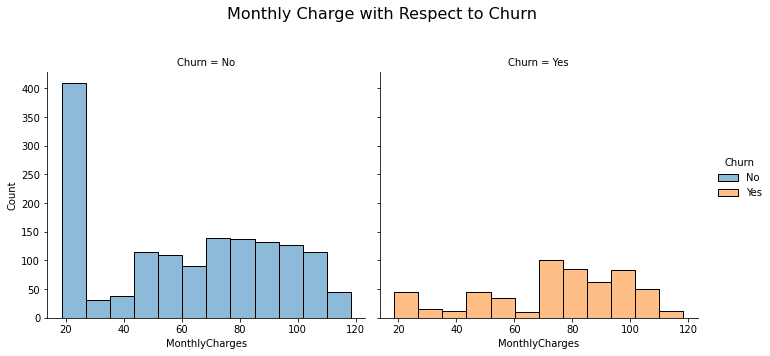

In [28]:
##the same chart as  above; however, in sns

sns.displot(data=df_copy, x="MonthlyCharges", hue="Churn", col="Churn")
plt.subplots_adjust(top=0.8)  
plt.suptitle("Monthly Charge with Respect to Churn", ha="center", fontsize=16)
plt.show()

## Notes:

- We can see that churn is relatively stable; however, most people who churned paid a monthly charge between \\$70 to \\$110

### TotalCharges vs Churn

In [29]:
px.histogram(data_frame= df_copy, x= "TotalCharges", color= "Churn", facet_col= "Churn", 
             title="Total Charge with Respect to Churn" )

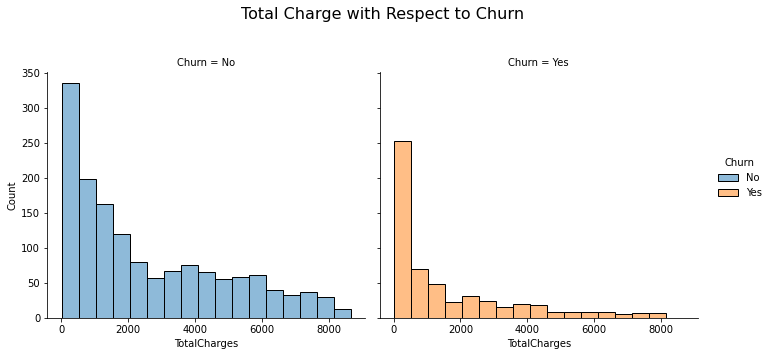

In [30]:
sns.displot(data= df_copy, x= "TotalCharges", hue= "Churn", col= "Churn", )
plt.subplots_adjust(top=0.8)  
plt.suptitle("Total Charge with Respect to Churn", ha="center", fontsize=16)
plt.show()

- It can be seen from the image above that most of Vodafone's loyal customers pay a total charge between 0 and \\$2000. 
- Similarly, most churners paid a total charge between 0 and \\$2000.

### Notes after Univariate Analysis:

- Individuals with 0 to 11 months of use are most likely to churn
- Individuals with electronic checks churn the most 
- Individuals on the fiber optics plan had the highest churn
- Individuals who paid via electronic check churned more.
- Individual with paperless billing churned more.
- Individuals on a month-to-month plan churned more. 
- Female customers churned more than male customers 
- Even though there were more non senior citizens than senior citizens (from our count plot), senior citizens churned more percentage-wise. This could be because of old age, death or other factors. 
- Customers with no dependents are most likely to churn 
- A high number of individuals paying monthly charges between \\$70 to \\$110 churned the most.

## 4.4 Bivariate Analysis

### 4.4.1 Relationship Between Total Churns and Monthly Charges with Respect To Churn

In [31]:
"""Let's see the relationship between monthly charges and totalcharges. We will like to see if total charges increase 
with Monthlycharges """

fig_4=px.scatter(df_copy, x="MonthlyCharges", y= "TotalCharges",color= "Churn", 
                 title= "Relationship Between MonthlyCharges and Total Charges")

offline.iplot(fig_4)

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

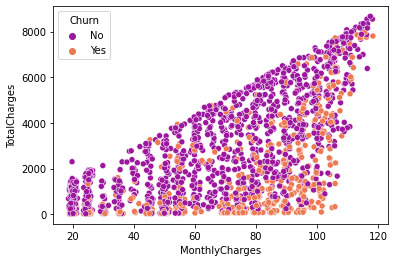

In [32]:
##using sns for the plot above 

sns.scatterplot(data= df_copy,x="MonthlyCharges", y= "TotalCharges", hue= "Churn", palette= "plasma")

### 4.4.2 Relationship between TotalCharges and tenure with respect to churn

In [33]:
fig_5= px.scatter(df_copy, x="tenure", y= "TotalCharges", color= "Churn", title= "Relationship Between Tenure and Total Charges")
offline.iplot(fig_5)

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

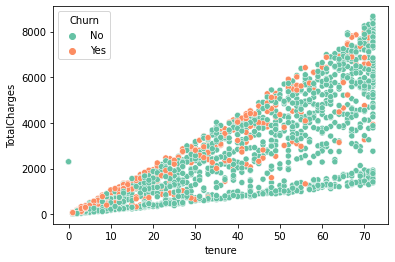

In [34]:
##using sns for the plot above 

sns.scatterplot(data= df_copy, x= "tenure", y= "TotalCharges", hue= "Churn", palette= "Set2" )

### 4.4.3 Relationship between TotalCharges and SeniorCitizens 

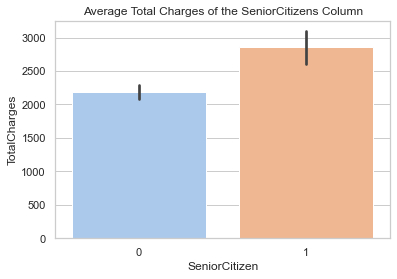

<Figure size 1440x1080 with 0 Axes>

In [35]:
sns.set_theme(style="whitegrid")
sns.barplot(x="SeniorCitizen", y="TotalCharges", data=df_copy, palette= "pastel")
plt.title("Average Total Charges of the SeniorCitizens Column")
#plt.xticks(rotation=90)
plt.figure(figsize= (20,15))
plt.show();

### 4.4.4 Relationship between TotalCharges and Churn

In [36]:
px.box(data_frame= df_copy, x="Churn", y= "TotalCharges", color="Contract", title= "Relationship Between Churn and TotalCharges with Respect to Contract")

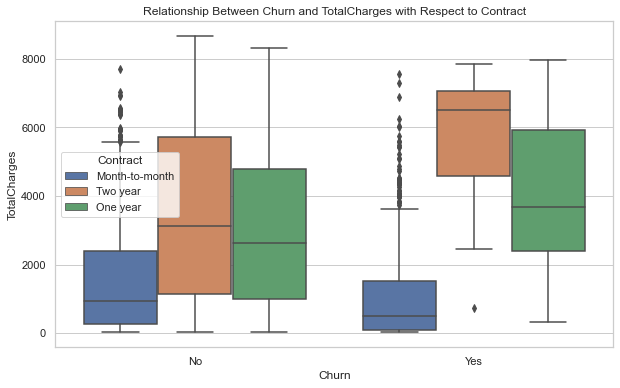

In [37]:
##replotting it in sns to enbale it show on GitHub

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x="Churn", y="TotalCharges", hue="Contract")
plt.title("Relationship Between Churn and TotalCharges with Respect to Contract")
plt.show()

### Notes:

- generally, churners were paying more total charges than non-churners


#### For No Churn:

- 50% of month-to-month customers who didn't churn are spending between \\$223 and \\$2,254.223. 

- 50% of Vodafone customers who are on a one-year plan and haven't churned spend  between \\$938 and \\$4598

- 50% of Vodafone customers who are on a two-year plan spend between \\$1270 and \\$5962. 


#### For Yes Churn:

- 50% of Vodafone customers who were on a month to month plan and churned spent between \\$94 and \\$1654.825. 

- 50% of Vodafone customers who were on a one-year plan and churned spent between \\$2354 and \\$5916. 

- 50% of Vodafone customers who were on a two-year plan and churned spent spent between \\$4554 and \\$7203. 
. 


#### For Outliers:


- A lot of customers who are on a month-to-month plan spent more than \\$5295, which is far more than what the average customer from that sample is paying. 

- Similarly, a lot of churners on a month-to-month plan were spending more than \\$3994, which is far more than what the average customer from that sample is paying. 

### 4.4.5 Relationship between Tenure and Churn

In [38]:
px.box(data_frame=df_copy, x= "Churn", y= "tenure", color= "Contract", title= "Relationship Between Churn and Tenure with Respect to Contract" )


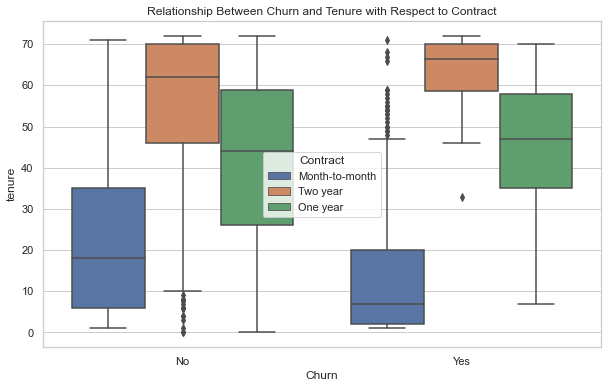

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_copy, x="Churn", y="tenure", hue="Contract")
plt.title("Relationship Between Churn and Tenure with Respect to Contract")
plt.show()

### Notes:

#### For No Churn:

- 50% of month-to-month customers who didn't churn currently have a tenure between 5 months and 33 months with the median tenure being 16 months.

- 50% of Vodafone customers who are on a one-year plan are on their 26th to 58th month. This shows most of them have renewed their service with the company, since one year-plan will last for 12 months. 

- 50% of Vodafone customers who are on a two-year plan are on thier 48th to 71th month. 


#### For Yes Churn:

- 50% of Vodafone customers who were on a month to month plan and churned spent only 2 to 21 months with the company. 

- 50% of Vodafone customers who were on a one-year plan and churned spent only 33 to 59 months with the company. 

- 50% of Vodafone customers who were on a two-year plan and churned spent only 51 to 70 months with the company. 


#### For Outliers:


- For No Churn, quite a number of customers who were on a two year plan-- as displayed by the dots below the lower whishker-- only had a tenure between 0 and 13 months. This could mean they churned within the stipulated timeframe, but Vodafone failed to label them as Churners. Or it could also mean that they have newly subscribed to the two-year plan; hence, their low tenure.

- It can also be seen that some churners who were on a month-to-month contract plans spent more than 50 months with the company before churning. 

- Only two customers considered as churners on a two-year contract spent less than 39 months with the company. 


### Notes From Bivariate Analysis:

- We can see that total charges and monthly charges have a positive correlation. Also,  Therefore, the more monthly charges a customer pays, the more likely their totalcharge will increase  Also, we can see that as monthly charges increases churn increases as well; however, decreases as Total Charge increases

- Also, total charges and tenure has a positive correlation. Therefore, the more time (tenure) a customer spends the more total charges they pay. We can also see churn within the first 10 months increases; however, as tenure and total charges increased, churn decreased

- Also, on average, senior citzens are paying a higher total charge than non-senior citizens

### Multivariate

<AxesSubplot:>

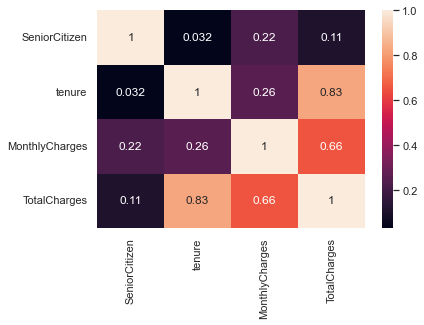

In [40]:
sns.heatmap(df_copy.corr(), annot= True)

### Relationship Between Monthly Charges and Contract

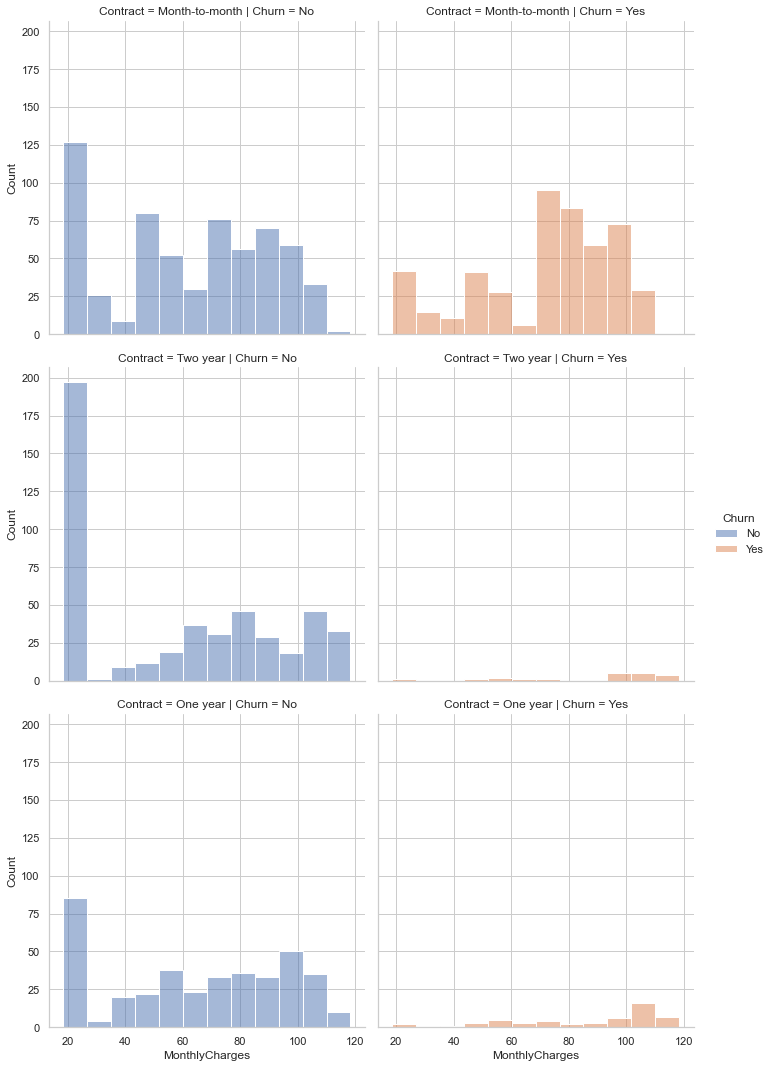

In [41]:
sns.displot(data= df_copy, x= "MonthlyCharges", hue= "Churn", row= "Contract", col= "Churn",height=5,
    aspect=1)

In [42]:
##the same graph below 
fig = px.histogram(df_copy, x="MonthlyCharges", color="Churn", facet_col="Churn",  facet_row= "Contract", nbins= 50,
                  title= "Relationship Between Month Charge and Churn with respect to Contract")
fig.show()

### Relationship Between Total Charges and Churn

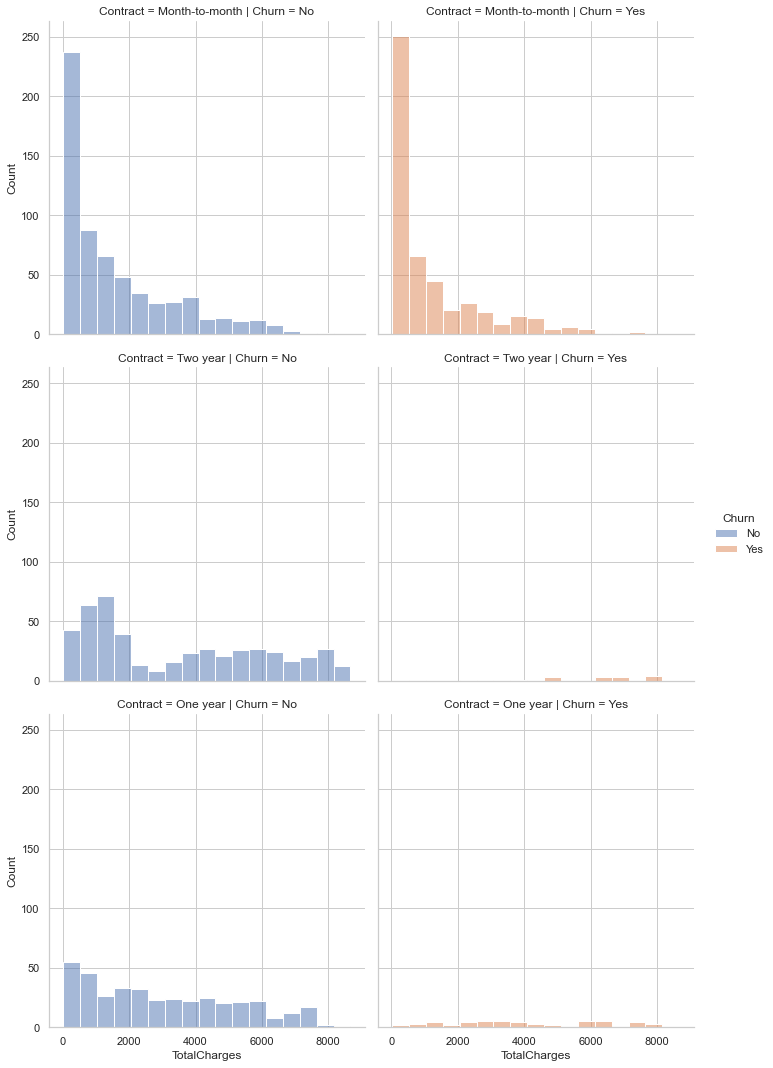

In [43]:
sns.displot(data= df_copy, x= "TotalCharges", hue= "Churn", row= "Contract", col= "Churn",height=5,
    aspect=1)

plt.show()

In [44]:
fig = px.histogram(df_copy, x="TotalCharges", color="Churn", facet_col="Churn",  facet_row= "Contract", 
                 title= "Relationship Between Total Charges and Churn with Respect to Contract" )
fig.show()

### Notes After Multivariate

- customers who were on a month-to-month payment plan and paid a monthly charge between \\$70 to \\$110 churned the most.
- Customers on a month to month plan that paid a total charges between \\$0 to \\$1600 churned the most

## Answering Questions 

We will be answering the questions below:

1. Which age group paid the highest total charge?
2. Which gender has the highest count of churn ? 
3. Which Internet Service is patronized the most?
4. How much total charge and monthly charge revenue does churners generate?
5. Which payment method is the most popular?

#### Question 1: Which Age Group paid the highest Total Charges? 

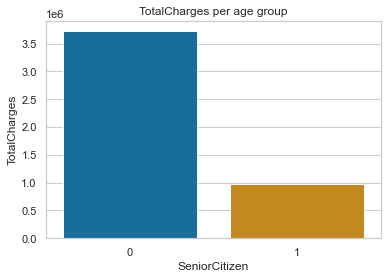

In [45]:
##The only age group given to us was the seniors column, therefore, we will see the amount each group paid 

sum_agegroup= df_copy.groupby("SeniorCitizen").agg({"TotalCharges": "sum"}).reset_index()

sns.barplot(x= "SeniorCitizen", y= "TotalCharges", data= sum_agegroup, palette= "colorblind")

plt.title("TotalCharges per age group")

plt.show()

#### Answer to Question1:

- From the chart above, we can see that non-senior citizens spend more money (interms of total charges) than senior citizens

#### Question 2: Which Gender Recorded the highest Churn

In [46]:
churners= df_copy[df_copy["Churn"]== "Yes"]

In [47]:
fig_6= px.histogram(x="gender", data_frame=churners, color= "gender", color_discrete_sequence=["teal", "grey"],
             title= "Plot of the Occurence Of Churn Across the Various Gender")

offline.iplot(fig_6)

#### Answer to Question2:
- Females tend to churn more than males 

### Question 3: Which Internet Service Is Patronized The Most?



In [48]:
internet_count= df.InternetService.value_counts().to_frame(name= "count") ##grouping the values

In [49]:
internet_count

count
Fiber optic    905
DSL            709
No             429

In [50]:
fig_7 = px.scatter(internet_count, x=internet_count.index, y='count', size='count', color= internet_count.index, 
                   
                hover_name=internet_count.index,
                 log_y=False, size_max=60, title= "Plot of The Popularity Of The Various Internet Services")

offline.iplot(fig_7)

#### Answer to Question3:

- Fiber Options was the most patronized Internet Service 

#### Question 4: How much total charge and monthly charge revenue does churners generate?

In [51]:
##since we are looking at churners, we will use the churners dataframe we created earlier in question 2

In [52]:
money= churners.agg({"MonthlyCharges": "sum", "TotalCharges": "sum"}).reset_index()

money.columns= ["Charge", "Amount"]

fig_8=px.bar(data_frame= money, x= "Charge",
       
       y= "Amount", title= "Revenue Generated By Churners", text= "Amount", color= "Charge",
             color_discrete_sequence= ["yellow", "black"])

offline.iplot(fig_8)

#### Answer to Question 4:

From the dataframe above, we can see that customers that churned generataed a whooping \\$139130 in monthly charges and \\$2,862,927 in total charges. This means Vodafone is losing \\$139130 monthly and a total of \\$2,862,927 due to Churns







#### Question 5: Which payment method is the most popular?

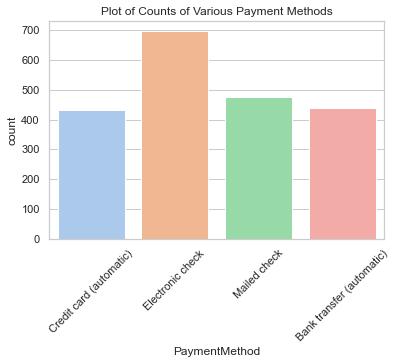

<Figure size 1080x360 with 0 Axes>

In [53]:
sns.countplot(x="PaymentMethod", data=df, palette= "pastel"  )
plt.title("Plot of Counts of Various Payment Methods")
plt.xticks(rotation= 45)
plt.figure(figsize= (15,5))
plt.show()

#### Answer to Question 5:
- We can see that electronic Check is the most popular payment method

### Note:

- Now we are done with our analysis, therefore, we will be using our df for our modelling. 

## Primary Feature Selection:

- in this section we will be selecting the best features for our algorithm. We will be using the Phi-Correlation

In [54]:
##getting the correlation of other features with churn

churn_corr= df.phik_matrix().loc["Churn"]

interval columns not set, guessing: ['SeniorCitizen', 'tenure', 'MonthlyCharges']


In [55]:
##sorting the values 
churn_cor=churn_corr.sort_values()

churn_cor

gender              0.000000
TotalCharges        0.000000
PhoneService        0.000000
MultipleLines       0.016624
StreamingTV         0.130414
StreamingMovies     0.130653
DeviceProtection    0.157462
OnlineBackup        0.169415
InternetService     0.188403
TechSupport         0.189080
OnlineSecurity      0.201518
Partner             0.211844
SeniorCitizen       0.243881
Contract            0.249794
Dependents          0.261046
PaperlessBilling    0.294694
MonthlyCharges      0.343752
PaymentMethod       0.407501
tenure              0.487654
Churn               1.000000
Name: Churn, dtype: float64

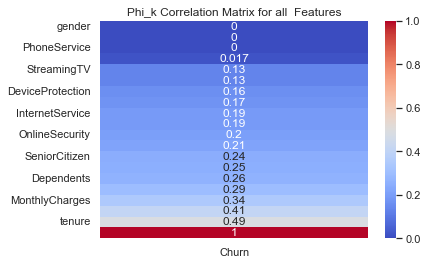

<Figure size 720x1080 with 0 Axes>

In [56]:
##ploting the phi-k correlation mattress
sns.heatmap(churn_cor.to_frame(), annot= True, cmap= "coolwarm")

plt.title("Phi_k Correlation Matrix for all  Features")

plt.figure(figsize= (10,15));

From our feature selection, we will be dropping columns with correlation coeeficient less than 0.2:
    
    - Gender
    - PhoneService
    - MultipleLines
  
    
    
Since they have a correlation less than 0.1

In [57]:
df_drop= df.drop(["gender", "PhoneService", "MultipleLines"], axis= 1)

In [58]:
df_drop

SeniorCitizen Partner Dependents  tenure InternetService OnlineSecurity  \
0                 0      No         No       6             DSL             No   
1                 0      No         No      19             DSL             No   
2                 0     Yes        Yes      69             DSL            Yes   
3                 0     Yes        Yes      11     Fiber optic             No   
4                 0     Yes         No      64     Fiber optic             No   
...             ...     ...        ...     ...             ...            ...   
2038              0     Yes        Yes      24             DSL            Yes   
2039              0     Yes        Yes      72     Fiber optic             No   
2040              0     Yes        Yes      11             DSL            Yes   
2041              1     Yes         No       4     Fiber optic             No   
2042              0      No         No      66     Fiber optic            Yes   

     OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0              No               No         Yes          No              No   
1              No              Yes         Yes          No              No   
2              No              Yes          No          No             Yes   
3              No               No          No          No              No   
4             Yes              Yes         Yes         Yes             Yes   
...           ...              ...         ...         ...             ...   
2038           No              Yes         Yes         Yes             Yes   
2039          Yes              Yes          No         Yes             Yes   
2040           No               No          No          No              No   
2041           No               No          No          No              No   
2042           No              Yes         Yes         Yes             Yes   

            Contract PaperlessBilling              PaymentMethod  \
0     Month-to-month              Yes    Credit card (automatic)   
1     Month-to-month              Yes    Credit card (automatic)   
2           Two year              Yes    Credit card (automatic)   
3     Month-to-month              Yes           Electronic check   
4     Month-to-month              Yes           Electronic check   
...              ...              ...                        ...   
2038        One year              Yes               Mailed check   
2039        One year              Yes    Credit card (automatic)   
2040  Month-to-month              Yes           Electronic check   
2041  Month-to-month              Yes               Mailed check   
2042        Two year              Yes  Bank transfer (automatic)   

      MonthlyCharges TotalCharges Churn  
0              49.50        312.7    No  
1              55.00       1046.5   Yes  
2              43.95       2960.1    No  
3              74.35        834.2   Yes  
4             111.15       6953.4    No  
...              ...          ...   ...  
2038           84.80       1990.5    No  
2039          103.20       7362.9    No  
2040           29.60       346.45    No  
2041           74.40        306.6   Yes  
2042          105.65       6844.5    No  

[2043 rows x 17 columns]

In [59]:
df_drop["TotalCharges"]= pd.to_numeric(df_drop["TotalCharges"], errors= "coerce")

## Modeling 

Note:
- We will be using the df_drop dataframe for our analysis 

### Step 1: Data Splitting

In [60]:
##creating our features and label

X= df_drop.drop("Churn", axis=1)
y= df_drop.Churn

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)

In [62]:
###converting our label to a numeric variable for easy analysis 

LE= LabelEncoder() ##initializing the model


num_y_train= LE.fit_transform(y_train) ##fitting and transforming on the train data

num_y_test= LE.transform(y_test) ##transforming on the test data

### Step 2: Creating Our Attributes

In [63]:

##getting our categorical attributes 
cat_attr= [i for i in df_drop.drop(["TotalCharges", "MonthlyCharges", "tenure", "Churn"], axis= 1)]


##getting our numerical attributes
num_attr= ["TotalCharges", "MonthlyCharges", "tenure"]


In [64]:
cat_attr

['SeniorCitizen',
 'Partner',
 'Dependents',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

In [65]:
num_attr

['TotalCharges', 'MonthlyCharges', 'tenure']

### Step 3: Creating Pipeline

#### Creating numeric pipeline

##### For Our Empty Rows:

- We will create a custom transformer to handle that

##### For our numeric values, we need to:

- Scale since our monthly transaction and total transaction are of different magnitudes and also since we will be using models sensitive to unscaled values.

- Also, we will create a function to handle the missing values in the numeric attribute. 


##### For our categorical 

- We will need to transform our categorical features to numeric using a onehotencoder
- We will also handle data in balance using Sklearns class_balance



### handling the empty space. The aim of the this function is to replace the missing values with NaN values

def remove_space(in_df):
    in_df["TotalCharges"]= in_df["TotalCharges"].replace(r"^\s*$", np.nan, regex= True)
    return in_df

"""Since we cannot fit and transform the function above, we will create a class with the function embedded to help 

us call, fit, and transform with the function above"""

class SpaceImputer():
    def __init__(self,func):
        self.func= func
    
    def transform(self, in_df, **transform_params):
        return self.func(in_df)
    
    def fit(self, X, y=None, **fit_params):
        return self
        

In [66]:
X_train.isna().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        3
dtype: int64

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
##This pipeline will handle the nan values in our dataset and also standardize our

## we are using mean because from our previous analysis, there were no outliers

num_pipeline= Pipeline([("mean_imputer", SimpleImputer(strategy="mean")), ("scaler", MinMaxScaler())])

cat_pipeline= Pipeline([("one_hot", OneHotEncoder())])

In [69]:
##we are combining our numeric and categorical pipelines with a Columntransformer

col_pipe= ColumnTransformer([("num_pipe", num_pipeline, num_attr),("cat_pipe", cat_pipeline, cat_attr)])


### Creating a pipeline for each Classifier (ML Algorithm)

#### DecisionTree CLassifier


In [70]:

DTP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
              ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
              ("model", DecisionTreeClassifier(random_state= 100))
              ])

In [71]:
DTP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model', DecisionTreeClassifier(random_state=100))])

In [72]:
result_1= DTP.predict(X_test)

In [73]:

print(classification_report(num_y_test,result_1))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       298
           1       0.56      0.49      0.52       111

    accuracy                           0.76       409
   macro avg       0.69      0.67      0.68       409
weighted avg       0.75      0.76      0.75       409



#### Logistic Regressor Pipeline

In [74]:

LRP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
              ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
              ("model", LogisticRegression(random_state= 100))
              ])

In [75]:
LRP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model', LogisticRegression(random_state=100))])

In [76]:
result_2= LRP.predict(X_test)

In [77]:
print(classification_report(num_y_test,result_2))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       298
           1       0.61      0.52      0.56       111

    accuracy                           0.78       409
   macro avg       0.72      0.70      0.71       409
weighted avg       0.77      0.78      0.77       409



#### Random Forest pipeline

In [78]:

RFP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
              ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
              ("model", RandomForestClassifier(n_estimators= 50, random_state= 100))
              ])

In [79]:
RFP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 RandomForestClassifier(n_estimators=50, random_state=100))])

In [80]:
result_3= RFP.predict(X_test)

In [81]:
print(classification_report( num_y_test,result_3))

              precision    recall  f1-score   support

           0       0.85      0.86      0.86       298
           1       0.61      0.60      0.61       111

    accuracy                           0.79       409
   macro avg       0.73      0.73      0.73       409
weighted avg       0.79      0.79      0.79       409



#### XGBoost Pipeline

In [82]:
XGP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", XGBClassifier(random_state= 100))
              ])

In [83]:
XGP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DevicePr...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=100, ...))])

In [84]:
result_4= XGP.predict(X_test)

In [85]:
print(classification_report(num_y_test, result_4))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       298
           1       0.57      0.57      0.57       111

    accuracy                           0.77       409
   macro avg       0.71      0.70      0.71       409
weighted avg       0.77      0.77      0.77       409



#### SVM Pipeline

In [86]:
SVP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
               ("feature_selection: ", SelectKBest(score_func=f_classif, k= 10)),
               ("model", SVC(random_state= 100))
              
              ])

In [87]:
SVP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection: ', SelectKBest()),
                ('model', SVC(random_state=100))])

In [88]:
result_5= SVP.predict(X_test)

In [89]:
print(classification_report(num_y_test, result_5))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       298
           1       0.65      0.43      0.52       111

    accuracy                           0.78       409
   macro avg       0.73      0.67      0.69       409
weighted avg       0.77      0.78      0.77       409



In [90]:
#### Results after base_modeling:


base_result= {"DTP": result_1, "LRP":result_2, "RFP": result_3, "XGP": result_4, "SVP":result_5}


for key, value in base_result.items():
    
    print(f"The performance of {key} is: \n\n", classification_report(num_y_test, value))

The performance of DTP is: 

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       298
           1       0.56      0.49      0.52       111

    accuracy                           0.76       409
   macro avg       0.69      0.67      0.68       409
weighted avg       0.75      0.76      0.75       409

The performance of LRP is: 

               precision    recall  f1-score   support

           0       0.83      0.88      0.85       298
           1       0.61      0.52      0.56       111

    accuracy                           0.78       409
   macro avg       0.72      0.70      0.71       409
weighted avg       0.77      0.78      0.77       409

The performance of RFP is: 

               precision    recall  f1-score   support

           0       0.85      0.86      0.86       298
           1       0.61      0.60      0.61       111

    accuracy                           0.79       409
   macro avg       0.73      0.73     

### Notes After Baseline Modeling:

- All our models did relatively well in predicting non-churners or the No or 0 class 

however, for the "Yes" class:

- Logistic regression did quite well in reducing false negatives (no classifying churners as non-churners)

- Whiles SVM had the highest precision for the "Yes" class; therefore it did well in predicting false positives(not classifying non-churners as churner)

### Dealing with Imbalance

##### In this section, we are going to see how functions like:

- class_weight  for models that we will be using class weight, i will be appending "_CW" to the name to signify class_weight

- SMOTE for models that we will be using class weight, i will be appending "_SM" to the name to signify SMOTE

affect a model's performance

### Using Class_Weight to Handle imbalance

In [91]:
##initializing our class weight for each class

class_weights = compute_class_weight('balanced', classes=[0, 1], y=num_y_train)


In [92]:
##assigning our weight to the respective class 

weight= dict(zip([0, 1], class_weights))

In [93]:
##viewing the weight of each class 

weight

{0: 0.6871320437342304, 1: 1.8359550561797753}

#### Decision Tree with class weight

In [94]:

CW_DTP = Pipeline([
    ##("spaceImputer", SpaceImputer(remove_space)),
    ("coltrans", col_pipe),
    ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
    ("model", DecisionTreeClassifier(
        random_state= 100, 
        class_weight= weight))
])

In [95]:
CW_DTP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 DecisionTreeClassifier(class_weight={0: 0.6871320437342304,
                                                      1: 1.8359550561797753},
                                        random_state=100))])

In [96]:
result_6= CW_DTP.predict(X_test)

In [97]:
print(classification_report(num_y_test, result_6))

              precision    recall  f1-score   support

           0       0.86      0.80      0.83       298
           1       0.55      0.67      0.60       111

    accuracy                           0.76       409
   macro avg       0.71      0.73      0.72       409
weighted avg       0.78      0.76      0.77       409



#### Logistic Regression with Class Weight

In [98]:
CW_LRP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", LogisticRegression(
                   random_state=100,
                   class_weight=weight))
              
              ])

In [99]:
CW_LRP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=100))])

In [100]:
result_7=CW_LRP.predict(X_test)

In [101]:
print(classification_report(num_y_test, result_7))

              precision    recall  f1-score   support

           0       0.91      0.69      0.79       298
           1       0.50      0.82      0.62       111

    accuracy                           0.73       409
   macro avg       0.71      0.76      0.70       409
weighted avg       0.80      0.73      0.74       409



#### Random Forest Class Weight

In [102]:
CW_RFC= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
                ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model",RandomForestClassifier(random_state= 100, n_estimators= 50,
                                               class_weight=weight))
              ])

In [103]:
CW_RFC.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 RandomForestClassifier(class_weight={0: 0.6871320437342304,
                                                      1: 1.8359550561797753},
                                        n_estimators=50, random_state=100))])

In [104]:
result_8= CW_RFC.predict(X_test)

In [105]:
print(classification_report(num_y_test, result_8))

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       298
           1       0.56      0.63      0.60       111

    accuracy                           0.77       409
   macro avg       0.71      0.72      0.72       409
weighted avg       0.78      0.77      0.77       409



#### XGBoost with Class Wieghts

In [106]:
# Set "scale_pos_weight" based on class balance
##we divie the majority class by the minority class

pos_weight = (sum(df_drop["Churn"]== "No"))/(sum(df_drop["Churn"]== "Yes"))

In [107]:
CW_XGB= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
                ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", XGBClassifier(random_state= 100,  scale_pos_weight=pos_weight))
              ])

In [108]:
CW_XGB.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DevicePr...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=100, ...))])

In [109]:
result_9= CW_XGB.predict(X_test)

In [110]:
print(classification_report(num_y_test, result_9))

              precision    recall  f1-score   support

           0       0.88      0.76      0.81       298
           1       0.52      0.71      0.60       111

    accuracy                           0.75       409
   macro avg       0.70      0.74      0.71       409
weighted avg       0.78      0.75      0.76       409



#### SVM with Class Weights

In [111]:

CW_SVM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
                ("feature_selection", SelectKBest(score_func=f_classif, k=20)),
               ("model", SVC( random_state= 100, kernel= "poly", class_weight="balanced"))
              ])

In [112]:
CW_SVM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest(k=20)),
                ('model',
                 SVC(class_weight='balanced', kernel='poly',
                     random_state=100))])

In [113]:
result_10= CW_SVM.predict(X_test)

In [114]:
print(classification_report(num_y_test, result_10))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       298
           1       0.51      0.81      0.63       111

    accuracy                           0.74       409
   macro avg       0.71      0.76      0.72       409
weighted avg       0.80      0.74      0.75       409



#### Results after dealing with imbalance with class_weight

In [115]:
result_cw= {"Decision Tree":result_1, "Decision_Tree_CW":result_6, "Logistic Regression":result_2, 
            
            "Logistic_Regression_CW": result_7, 
            
            "Random Forest": result_3, "Random_Forest_CW":result_8, "XGB":result_4, "XGB_CW":result_9, 
            
            "SVM": result_5,"SVM_CW":result_10}

for key, value in result_cw.items():
    print(f"Classification Report for {key}, is: \n\n",(classification_report(num_y_test,value)))

Classification Report for Decision Tree, is: 

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       298
           1       0.56      0.49      0.52       111

    accuracy                           0.76       409
   macro avg       0.69      0.67      0.68       409
weighted avg       0.75      0.76      0.75       409

Classification Report for Decision_Tree_CW, is: 

               precision    recall  f1-score   support

           0       0.86      0.80      0.83       298
           1       0.55      0.67      0.60       111

    accuracy                           0.76       409
   macro avg       0.71      0.73      0.72       409
weighted avg       0.78      0.76      0.77       409

Classification Report for Logistic Regression, is: 

               precision    recall  f1-score   support

           0       0.83      0.88      0.85       298
           1       0.61      0.52      0.56       111

    accuracy                 

#### Notes: 

- After adding class weights, our models performed better in terms of improvement in the yes class predictions. There was an increase in the recalll for the yes class, which means the model had less false negatives which is something we want

- Again SVM and Logistic Regression topped the charts. However, it is worth noting that while the recall of the Yes class increased the precision decreased, and this is a normal thing thanks to recall-precision trade off

- overall, adding class weights improved the performance of the model for both classes as opposed to not using weights 

### Trying our model with SMOTE:

#### SMOTE with DecisionTree

In [116]:
DTP_SM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),# Perform feature selection
               ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
               ("model", DecisionTreeClassifier(random_state= 100))  
              ])

In [117]:
DTP_SM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(random_state=100)),
                ('model', DecisionTreeClassifier(random_state=100))])

In [118]:
result_11= DTP_SM.predict(X_test)

In [119]:
print(classification_report(num_y_test, result_11))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82       298
           1       0.52      0.64      0.57       111

    accuracy                           0.74       409
   macro avg       0.69      0.71      0.70       409
weighted avg       0.76      0.74      0.75       409



#### SMOTE with Logistic Regression

In [120]:
LGR_SM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),# Perform feature selection
              ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
               ("model", LogisticRegression(random_state= 100))  
              ])

In [121]:
LGR_SM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(random_state=100)),
                ('model', LogisticRegression(random_state=100))])

In [122]:
result_12= LGR_SM.predict(X_test)

In [123]:
print(classification_report(num_y_test, result_12))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       298
           1       0.51      0.82      0.63       111

    accuracy                           0.74       409
   macro avg       0.71      0.76      0.71       409
weighted avg       0.80      0.74      0.75       409



#### SMOTE with Random Forest

In [124]:
RF_SM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),# Perform feature selection
               ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
               ("model",RandomForestClassifier(random_state= 100, n_estimators= 50))  
              ])

In [125]:
RF_SM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(random_state=100)),
                ('model',
                 RandomForestClassifier(n_estimators=50, random_state=100))])

In [126]:
result_13= RF_SM.predict(X_test)

In [127]:
print(classification_report(num_y_test, result_13))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       298
           1       0.57      0.68      0.62       111

    accuracy                           0.77       409
   macro avg       0.72      0.75      0.73       409
weighted avg       0.79      0.77      0.78       409



#### SMOTE with XGBOOST

In [128]:
XGB_SM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),# Perform feature selection
               ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
               ("model", XGBClassifier(random_state= 100))  
              ])

In [129]:
XGB_SM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DevicePr...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=100, ...))])

In [130]:
result_14= XGB_SM.predict(X_test)

In [131]:
print(classification_report(num_y_test, result_14))

              precision    recall  f1-score   support

           0       0.87      0.78      0.82       298
           1       0.54      0.68      0.60       111

    accuracy                           0.75       409
   macro avg       0.70      0.73      0.71       409
weighted avg       0.78      0.75      0.76       409



#### SMOTE with SVM

In [132]:
SVM_SM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),# Perform feature selection
               ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
               ("model", SVC(random_state= 100))  
              ])

In [133]:
SVM_SM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(random_state=100)),
                ('model', SVC(random_state=100))])

In [134]:
result_15= SVM_SM.predict(X_test)

In [135]:
print(classification_report(num_y_test, result_15))

              precision    recall  f1-score   support

           0       0.91      0.74      0.81       298
           1       0.53      0.79      0.64       111

    accuracy                           0.75       409
   macro avg       0.72      0.77      0.72       409
weighted avg       0.80      0.75      0.77       409



### Comparing results of Class_weight vs SMOTE vs Baseline

### Note 

- models with _SM refers to models I used the SMOTE technique 
- models with _CW refers to models I applied the Class_weight technique 

In [136]:
imbalance_result= {"Decision Tree":result_1, "Decision Tree_SM":result_11, "Decision_Tree_CW":result_6, 
               
                   "Logistic Regression": result_2, "Logistic Regression_SM":result_12, "Logistic_Regression_CW": result_7, 
            
             "Random Forest": result_3, "Random Forest_SM": result_13, "Random_Forest_CW":result_8, 
               
               "XGBoost": result_4, "XGB_SM":result_14, "XGB_CW":result_9, 
                   
                   "SVM": result_5, "SVM_SM": result_15,"SVM_CW":result_10}

for key, value in imbalance_result.items():
    
    print(f"Classification Report for {key}, is: \n\n",(classification_report(num_y_test,value)))

Classification Report for Decision Tree, is: 

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       298
           1       0.56      0.49      0.52       111

    accuracy                           0.76       409
   macro avg       0.69      0.67      0.68       409
weighted avg       0.75      0.76      0.75       409

Classification Report for Decision Tree_SM, is: 

               precision    recall  f1-score   support

           0       0.85      0.78      0.82       298
           1       0.52      0.64      0.57       111

    accuracy                           0.74       409
   macro avg       0.69      0.71      0.70       409
weighted avg       0.76      0.74      0.75       409

Classification Report for Decision_Tree_CW, is: 

               precision    recall  f1-score   support

           0       0.86      0.80      0.83       298
           1       0.55      0.67      0.60       111

    accuracy                    

In [137]:
##creating a table for our most important metrics 

table_data = []
columns = ["Model", "Average Recall", "Recall (Class 1)", "F1 Score", "Accuracy"]

for key, value in imbalance_result.items():
    report = classification_report(num_y_test, value, output_dict=True)
    avg_recall = report["weighted avg"]["recall"]
    class1_recall = report["1"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    accuracy = report["accuracy"]
    table_data.append([key, avg_recall, class1_recall, f1_score, accuracy])

df = pd.DataFrame(table_data, columns=columns)
df.sort_values(by= "Recall (Class 1)", ascending= False)

Model  Average Recall  Recall (Class 1)  F1 Score  \
4   Logistic Regression_SM        0.738386          0.819820  0.752145   
5   Logistic_Regression_CW        0.728606          0.819820  0.743137   
14                  SVM_CW        0.740831          0.810811  0.754240   
13                  SVM_SM        0.753056          0.792793  0.765020   
11                  XGB_CW        0.745721          0.711712  0.755985   
7         Random Forest_SM        0.772616          0.684685  0.778726   
10                  XGB_SM        0.753056          0.675676  0.761007   
2         Decision_Tree_CW        0.760391          0.666667  0.767053   
1         Decision Tree_SM        0.743276          0.639640  0.750648   
8         Random_Forest_CW        0.767726          0.630631  0.771561   
6            Random Forest        0.789731          0.603604  0.789127   
9                  XGBoost        0.767726          0.567568  0.767395   
3      Logistic Regression        0.779951          0.522523  0.774282   
0            Decision Tree        0.757946          0.486486  0.752147   
12                     SVM        0.782396          0.432432  0.766995   

    Accuracy  
4   0.738386  
5   0.728606  
14  0.740831  
13  0.753056  
11  0.745721  
7   0.772616  
10  0.753056  
2   0.760391  
1   0.743276  
8   0.767726  
6   0.789731  
9   0.767726  
3   0.779951  
0   0.757946  
12  0.782396

### Notes:

- Balancing did improve the performance of our model, especially for the yes class. 

- At the end of this, we realized that the class-weights method did relatively better than the SMOTE method

- Overall Logistic regression performed the best

- Since Class weights performed better, we will be using it for our modelling 

### Ensemble Techniques

In this section, we will take a look at how various ensemble learning techniques affect our models performance. As we know certain models have low biases and high variance, whiles others have high bias and low variance, therefore, we will use the appopiriate ensemble technique to curb these.



### Frame of work:

- Bagging, works well fore models with high variance and low bias. These include algorithms such as: Random Forest, XGBoost, Decision Tree, and SVM


The idea here is to see how these affect our models, and which to choose for our hyperparameter tuning

### Bagging Decision Tree with Class Weight 

In [138]:
en_DTP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", BaggingClassifier(DecisionTreeClassifier(
                   random_state=100,
                   class_weight=weight), bootstrap_features= True,random_state= 100))
              
              ])

In [139]:
en_DTP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.6871320437342304,
                                                                                       1: 1.8359550561797753},
                                                                         random_state=100),
                                   bootstrap_features=True,
                                   random_state=100))])

In [140]:
result_16= en_DTP.predict(X_test)
print(classification_report(num_y_test, result_16))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       298
           1       0.52      0.72      0.60       111

    accuracy                           0.74       409
   macro avg       0.70      0.74      0.71       409
weighted avg       0.78      0.74      0.75       409



### Bagging Logistic Regression with Class Weight

In [141]:
en_LRP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", BaggingClassifier(LogisticRegression(
                   random_state=100,
                   class_weight=weight), bootstrap_features= True,random_state= 100))
              
              ])

In [142]:
en_LRP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 BaggingClassifier(base_estimator=LogisticRegression(class_weight={0: 0.6871320437342304,
                                                                                   1: 1.8359550561797753},
                                                                     random_state=100),
                                   bootstrap_features=True,
                                   random_state=100))])

In [143]:
result_17= en_LRP.predict(X_test)
print(classification_report(num_y_test, result_17))

              precision    recall  f1-score   support

           0       0.91      0.68      0.78       298
           1       0.49      0.83      0.62       111

    accuracy                           0.72       409
   macro avg       0.70      0.75      0.70       409
weighted avg       0.80      0.72      0.73       409



### Bagging Random Forest with Class Weight

In [144]:
en_RFP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", BaggingClassifier(RandomForestClassifier(
                   random_state=100,
                   class_weight=weight), bootstrap_features= True,random_state= 100))
              
              ])

In [145]:
en_RFP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 BaggingClassifier(base_estimator=RandomForestClassifier(class_weight={0: 0.6871320437342304,
                                                                                       1: 1.8359550561797753},
                                                                         random_state=100),
                                   bootstrap_features=True,
                                   random_state=100))])

In [146]:
result_18= en_DTP.predict(X_test)
print(classification_report(num_y_test, result_18))

              precision    recall  f1-score   support

           0       0.88      0.75      0.81       298
           1       0.52      0.72      0.60       111

    accuracy                           0.74       409
   macro avg       0.70      0.74      0.71       409
weighted avg       0.78      0.74      0.75       409



### Bagging XGBOOST with Class Weight

In [147]:
en_XGB= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", BaggingClassifier(XGBClassifier(
                   random_state=100,
                  scale_pos_weight=pos_weight), bootstrap_features= True,random_state= 100))
              
              ])

In [148]:
en_XGB.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DevicePr...
                                                                interaction_constraints=None,
                                                                learning_rate=None,
                                                                max_bin=None,
                                                                max_cat_threshold=None,
                                                                max_cat_to_onehot=None,
                                                                max_delta_step=None,
                                                                max_depth=None,
                                                                max_leaves=None,
                                                                min_child_weight=None,
                                                                missing=nan,
                                                                monotone_constraints=None,
                                                                n_estimators=100,
                                                                n_jobs=None,
                                                                num_parallel_tree=None,
                                                                predictor=None,
                                                                random_state=100, ...),
                                   bootstrap_features=True,
                                   random_state=100))])

In [149]:
result_19= en_XGB.predict(X_test)
print(classification_report(num_y_test, result_19))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80       298
           1       0.50      0.76      0.60       111

    accuracy                           0.73       409
   macro avg       0.70      0.74      0.70       409
weighted avg       0.78      0.73      0.74       409



### Bagging of SVM with class weight

In [150]:
en_SVM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", BaggingClassifier(SVC(
                   random_state=100,
                   class_weight=weight), bootstrap_features= True,random_state= 100))
              
              ])

In [151]:
en_SVM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 BaggingClassifier(base_estimator=SVC(class_weight={0: 0.6871320437342304,
                                                                    1: 1.8359550561797753},
                                                      random_state=100),
                                   bootstrap_features=True,
                                   random_state=100))])

In [152]:
result_20= en_SVM.predict(X_test)
print(classification_report(num_y_test, result_20))

              precision    recall  f1-score   support

           0       0.91      0.72      0.80       298
           1       0.51      0.80      0.63       111

    accuracy                           0.74       409
   macro avg       0.71      0.76      0.71       409
weighted avg       0.80      0.74      0.75       409



### Ensemble Result Comparison:

- In this section, we will be comparing the result of our base model, our ensembled model, and our classweight without ensemble model

In [153]:
ensemble_result= {"Decision Tree":result_1, "Decision_Tree_CW":result_6, "Decision Tree_en":result_16,  
               
                   "Logistic Regression": result_2, "Logistic_Regression_CW": result_7, "Logistic Regression_en":result_17,  
            
             "Random Forest": result_3,"Random_Forest_CW":result_8,  "Random Forest_en": result_18, 
               
               "XGBoost": result_4,"XGB_CW":result_9,  "XGB_en":result_18, 
                   
                   "SVM": result_5,"SVM_CW":result_10, "SVM_en": result_20}

for key, value in ensemble_result.items():
    
    print(f"Classification Report for {key}, is: \n\n",(classification_report(num_y_test,value)))
   

Classification Report for Decision Tree, is: 

               precision    recall  f1-score   support

           0       0.82      0.86      0.84       298
           1       0.56      0.49      0.52       111

    accuracy                           0.76       409
   macro avg       0.69      0.67      0.68       409
weighted avg       0.75      0.76      0.75       409

Classification Report for Decision_Tree_CW, is: 

               precision    recall  f1-score   support

           0       0.86      0.80      0.83       298
           1       0.55      0.67      0.60       111

    accuracy                           0.76       409
   macro avg       0.71      0.73      0.72       409
weighted avg       0.78      0.76      0.77       409

Classification Report for Decision Tree_en, is: 

               precision    recall  f1-score   support

           0       0.88      0.75      0.81       298
           1       0.52      0.72      0.60       111

    accuracy                    

### Let's the our desired metrics in a dataframe

In [154]:
import pandas as pd

table_data = []
columns = ["Model", "Average Recall", "Recall (Class 1)", "F1 Score", "Accuracy"]

for key, value in ensemble_result.items():
    report = classification_report(num_y_test, value, output_dict=True)
    avg_recall = report["weighted avg"]["recall"]
    class1_recall = report["1"]["recall"]
    f1_score = report["weighted avg"]["f1-score"]
    accuracy = report["accuracy"]
    table_data.append([key, avg_recall, class1_recall, f1_score, accuracy])

en_df = pd.DataFrame(table_data, columns=columns)
en_df.sort_values(by= "Recall (Class 1)", ascending= False)

Model  Average Recall  Recall (Class 1)  F1 Score  \
5   Logistic Regression_en        0.718826          0.828829  0.734173   
4   Logistic_Regression_CW        0.728606          0.819820  0.743137   
13                  SVM_CW        0.740831          0.810811  0.754240   
14                  SVM_en        0.740831          0.801802  0.754075   
2         Decision Tree_en        0.743276          0.720721  0.754124   
8         Random Forest_en        0.743276          0.720721  0.754124   
11                  XGB_en        0.743276          0.720721  0.754124   
10                  XGB_CW        0.745721          0.711712  0.755985   
1         Decision_Tree_CW        0.760391          0.666667  0.767053   
7         Random_Forest_CW        0.767726          0.630631  0.771561   
6            Random Forest        0.789731          0.603604  0.789127   
9                  XGBoost        0.767726          0.567568  0.767395   
3      Logistic Regression        0.779951          0.522523  0.774282   
0            Decision Tree        0.757946          0.486486  0.752147   
12                     SVM        0.782396          0.432432  0.766995   

    Accuracy  
5   0.718826  
4   0.728606  
13  0.740831  
14  0.740831  
2   0.743276  
8   0.743276  
11  0.743276  
10  0.745721  
1   0.760391  
7   0.767726  
6   0.789731  
9   0.767726  
3   0.779951  
0   0.757946  
12  0.782396

### Notes after Ensembling:

- Our models prediction for the Yes class greatly improved as we balanced the weights and used ensemble methods.

- The base model for SVM did well by having the highest precision for the Yes class, while Logistic Regression with weights did well by having the highest recall for the Yes class

In summary:

- The class_weights imbalance handling method performed better than SMOTE 

- We will be using Logistic Regression with class weight(LR_CW) as our final model since it recorded the highest recall for the "Yes" or "1" class. 

### Using Stacking to Create a Hybrid Model-- Just For Fun

From our initial modelling, we realized that the base model for SVM did well, while the balanced model for Logistic Regression did well. Therefore, we will like to combine them to see how well these two will do together

In [155]:
##building our stacking classifier

# Define the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[
        ("logistic", LogisticRegression(
                   random_state=100,
                   class_weight=weight)),
        ("svm", BaggingClassifier(SVC(
                   random_state=100,
                   class_weight=weight), bootstrap_features= True,random_state= 100))
    ],
    final_estimator=LogisticRegression(
                   random_state=100, class_weight=weight))

In [156]:
st_LRP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", stacking_clf)
              
              ])

In [157]:
st_LRP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DevicePr...
                                                 LogisticRegression(class_weight={0: 0.6871320437342304,
                                                                                  1: 1.8359550561797753},
                                                                    random_state=100)),
                                                ('svm',
                                                 BaggingClassifier(base_estimator=SVC(class_weight={0: 0.6871320437342304,
                                                                                                    1: 1.8359550561797753},
                                                                                      random_state=100),
                                                                   bootstrap_features=True,
                                                                   random_state=100))],
                                    final_estimator=LogisticRegression(class_weight={0: 0.6871320437342304,
                                                                                     1: 1.8359550561797753},
                                                                       random_state=100)))])

In [158]:
result_21= st_LRP.predict(X_test)

In [159]:
##now let's compare the stacking results with that of the Logistic Regression result with class weight 

In [160]:
##stacking results
print(classification_report(num_y_test, result_21))

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       298
           1       0.50      0.82      0.62       111

    accuracy                           0.73       409
   macro avg       0.71      0.76      0.71       409
weighted avg       0.80      0.73      0.75       409



In [161]:
##Logistic Regression with class weight 

print(classification_report(num_y_test, result_12))

              precision    recall  f1-score   support

           0       0.91      0.71      0.80       298
           1       0.51      0.82      0.63       111

    accuracy                           0.74       409
   macro avg       0.71      0.76      0.71       409
weighted avg       0.80      0.74      0.75       409



### Results after stacking:

- There was only an increase in the precision and recall for the 0 class


In [162]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [163]:
en_GBC= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", GBC(
                   random_state=100))
              
              ])

In [164]:
en_GBC.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model', GradientBoostingClassifier(random_state=100))])

In [165]:
result_GBC= en_GBC.predict(X_test)

In [166]:
print(classification_report(num_y_test,result_GBC ))

              precision    recall  f1-score   support

           0       0.82      0.90      0.86       298
           1       0.65      0.48      0.55       111

    accuracy                           0.79       409
   macro avg       0.73      0.69      0.71       409
weighted avg       0.77      0.79      0.78       409



In [167]:
pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [168]:

from imblearn.combine import SMOTETomek, SMOTEENN


In [169]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE
from imblearn.over_sampling import SMOTENC

In [170]:
from imblearn.over_sampling import KMeansSMOTE, SVMSMOTE


In [171]:
en_GBC= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
    
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", GBC(
                   random_state=100))
              
              ])

In [172]:
GBC_SM= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe), 
               ("feature_selection", SelectKBest(score_func=f_classif, k=10)),# Perform feature selection
               ("smote", SMOTE(random_state=100)),  # Apply SMOTE for oversampling
               ("model", GBC(
                   random_state=100))
              ])

In [173]:
GBC_SM.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('smote', SMOTE(random_state=100)),
                ('model', GradientBoostingClassifier(random_state=100))])

In [174]:
sm_gbc= GBC_SM.predict(X_test)

In [175]:
print(classification_report(num_y_test, sm_gbc))

              precision    recall  f1-score   support

           0       0.89      0.77      0.83       298
           1       0.55      0.75      0.63       111

    accuracy                           0.76       409
   macro avg       0.72      0.76      0.73       409
weighted avg       0.80      0.76      0.77       409



### Note:

- We will not be using the stacking for anything, I was just trying my hands to see how it works

# Hyperparameter Tuning

From our modeling, Logistic regression stood out, when we considered the recall and relative precision of the Yes class (Churners). So, what we will do here is to run a Grid_search CV to find the best hyperparameters for our model to increase its performance. 

#### What will we do?

- We will perform a hyperparameter gridsearch on just the model then find the best parameters, and then add it to our pipeline.

### Note:

- I will be using log loss as my final evaluation metric, therefore, I will create a custom scorer 

In [176]:
##loading our model 

CW_LRP

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=100))])

In [177]:
##creating a set of C-values for our hyperparameter to loop over to see which one gives us a lower log loss

np.geomspace(1e-5, 1e5, num=20) 

## geomspace generates a set of evenly spaced numbers over a logarithimic scale

array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05])

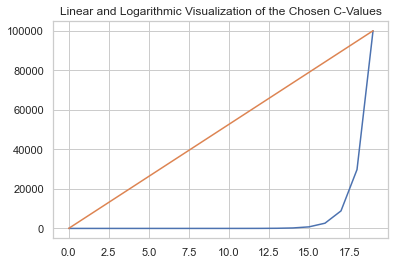

In [178]:
##plotting our np.geomspace(1e-5, 1e5, num=20) to see if it is evenly spaced out 

##this will help us visualize the spacing logarithmicly
plt.plot(np.geomspace(1e-5, 1e5, num=20)) 

##this will help us visualize the spacing linearly since the logarithmic method can be difficult

plt.plot(np.linspace(1e-5, 1e5, num=20)) 

plt.title("Linear and Logarithmic Visualization of the Chosen C-Values")

plt.show()

In [179]:
##We are going to create a copy of the CW_LRP and rename it for the purpose of hyperparameter tuning

HP_LRP= Pipeline([##("spaceImputer", SpaceImputer(remove_space)),
               ("coltrans", col_pipe),  
            ("feature_selection", SelectKBest(score_func=f_classif, k=10)),
               ("model", LogisticRegression(
                   random_state=100,
                   class_weight=weight))
              
              ])

In [180]:
###creating the params

params = {
    "model__C": np.geomspace(1e-5, 1e5, num=20),
    "model__max_iter": [100, 1200],
    "model__random_state": [24, 42, 57, 100]
}

In [181]:
##setting our parametersand telling it to return the model with the lowest log loss
##the scorer is setting log loss as our metric, and also, I am telling it to choose the model with the lowest score
## the need_proba is telling it to accept returned values and calculate the probability of each predicted label 

scorer = make_scorer(log_loss, greater_is_better=False, needs_proba=True)

Grid_HPT= GridSearchCV(estimator=HP_LRP, param_grid=params,scoring=scorer, cv=5)

In [182]:
Grid_HPT.fit(X_train, num_y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('coltrans',
                                        ColumnTransformer(transformers=[('num_pipe',
                                                                         Pipeline(steps=[('mean_imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          MinMaxScaler())]),
                                                                         ['TotalCharges',
                                                                          'MonthlyCharges',
                                                                          'tenure']),
                                                                        ('cat_pipe',
                                                                         Pipeline(steps=[('one_hot',
                                                                                          OneHotEncoder())]),
                                                                         ['SeniorCitizen',
                                                                          'Partner',
                                                                          'Dependents',
                                                                          'InternetService',
                                                                          'OnlineSecuri...
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'model__max_iter': [100, 1200],
                         'model__random_state': [24, 42, 57, 100]},
             scoring=make_scorer(log_loss, greater_is_better=False, needs_proba=True))

In [183]:
##saving the best parameters and scores into the following variables

best_params = Grid_HPT.best_params_
best_score = Grid_HPT.best_score_
cv_results = Grid_HPT.cv_results_

In [184]:
print("Best Parameters:", best_params)
print("Best Parameters:", best_score)


Best Parameters: {'model__C': 100000.0, 'model__max_iter': 100, 'model__random_state': 24}
Best Parameters: -0.5226339548519363


In [185]:
##setting the parameters gotten from the hyperparameter tuning

HP_LRP.set_params(
                  model__random_state= 24,
                  model__max_iter=100,
                  model__C= 0.1623776739188721)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(C=0.1623776739188721,
                                    class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=24))])

In [186]:
##fitting our pipeline with the parameters to our train and test variables

HP_LRP.fit(X_train, num_y_train)

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(C=0.1623776739188721,
                                    class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=24))])

## Model Evaluation Using Log Loss

In this section, I will be evaluating the performance of my Logistic Regression model before and after hyperparameter tuning using Log-Loss.

### Model Evaluation For Logistic Regression

In [187]:
##loading my Logistic Regression Pipeline

CW_LRP

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=100))])

In [188]:
##we are predicting over  our X_train to get values for our log loss function

LR_train_pred= CW_LRP.predict(X_train)
LR_train_pred_proba= CW_LRP.predict_proba(X_train)

In [189]:
##note, log-loss accepts the predicted probability for the predicted value, and not the actual predicted value

print ("the log loss of the training set is for untuned Logistic Regression is: ",  log_loss(num_y_train,LR_train_pred_proba))

the log loss of the training set is for untuned Logistic Regression is:  0.5123278089423231


In [190]:
##Let's ge the probabilityloss of the test set:

LR_test_pred_proba= CW_LRP.predict_proba(X_test)

In [191]:
print ("the log loss of the test set is for untuned Logistic Regression is: ",  log_loss(num_y_test,LR_test_pred_proba))

the log loss of the test set is for untuned Logistic Regression is:  0.5280247278442394


### Model evaluation of the Tuned Logistic Regression Model

In [192]:
HP_LR_train_pred_proba= HP_LRP.predict_proba(X_train)
print ("the log loss of the train set is for tuned Logistic Regression is: ",  log_loss(num_y_train,HP_LR_train_pred_proba))

the log loss of the train set is for tuned Logistic Regression is:  0.5141322447074869


In [193]:
HP_test_pred_proba= HP_LRP.predict_proba(X_test)

In [194]:
print ("the log loss of the test set is for the tuned Logistic Regression is: ",  log_loss(num_y_test,HP_test_pred_proba))

the log loss of the test set is for the tuned Logistic Regression is:  0.5299183182610446


### Classification Reports for Both Tunes and Untuned Model

In [195]:
tuned_result= HP_LRP.predict(X_test)

In [196]:
untuned_result= CW_LRP.predict(X_test)

In [197]:
print("Classification report for Tuned LR is:  \n\n", classification_report(num_y_test, tuned_result))

Classification report for Tuned LR is:  

               precision    recall  f1-score   support

           0       0.91      0.69      0.79       298
           1       0.50      0.82      0.62       111

    accuracy                           0.73       409
   macro avg       0.70      0.76      0.70       409
weighted avg       0.80      0.73      0.74       409



In [198]:
print("Classification report for unTuned LR is\n\n", classification_report(num_y_test, untuned_result))

Classification report for unTuned LR is

               precision    recall  f1-score   support

           0       0.91      0.69      0.79       298
           1       0.50      0.82      0.62       111

    accuracy                           0.73       409
   macro avg       0.71      0.76      0.70       409
weighted avg       0.80      0.73      0.74       409



### Notes after Hyperparameter Tuning:

- We can see that our tuned model has a relatively lower log loss than our untuned model, which makes it better. 
- There wasn't any clear difference when using the classification report 

## Hypothesis Testing

Null hypothesis:
There is no significant relationship between the dependents and their likelihood to churn.

Alternative hypothesis:
There is a significant relationship between the dependents and their likelihood to churn.   

In [199]:

# Creating a contingency table
contingency_table = pd.crosstab(df_copy['Dependents'], df_copy['Churn'])

# Performing the chi-square test
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Printing the test results
print("Chi-square statistic:", chi2)
print("P-value:", p_value)
print("Degrees of freedom:", dof)
print("Expected frequencies:", expected)

# Setting my significance level (alpha)
alpha = 0.05

# Comparing the obtained p-value with alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant relationship between dependents and churn.")
else:
    print("Fail to reject the null hypothesis. There is no significant relationship between dependents and churn.")

Chi-square statistic: 58.72609094087139
P-value: 1.812223705021546e-14
Degrees of freedom: 1
Expected frequencies: [[1027.72589329  384.27410671]
 [ 459.27410671  171.72589329]]
Reject the null hypothesis. There is a significant relationship between dependents and churn.


In [200]:
for col in df_drop.columns:
    print(df_drop[col].unique())

[0 1]
['No' 'Yes']
['No' 'Yes']
[ 6 19 69 11 64 39 15 25 66 61 43 12 23 71 34  5 41 72 14  1 10  7  9 48
 20 16  2 22 35 54 56 18 68 53 30 36 55 21 33 44  4 49 42 67 40 45 57  8
 65  3 17 28 52 47 50 46 29 27 13 24 62 26 60 51 70 59 38 37  0 58 31 32
 63]
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'Two year' 'One year']
['Yes' 'No']
['Credit card (automatic)' 'Electronic check' 'Mailed check'
 'Bank transfer (automatic)']
[ 49.5   55.    43.95 ...  78.7   60.65 103.2 ]
[ 312.7  1046.5  2960.1  ...  346.45  306.6  6844.5 ]
['No' 'Yes']


# Conclusion and Recommendation

### From my EDA, I highly recommend that Vodafone does the following:

I highly recommend that Vodafone's retainment advertisements and promotions should target:

- Customers have a tenure between 0 to 11 months. 
- Female customers
- Senior citizens
- Individuals with no dependants/partners. 
- High churn rate was observed for customers on a month-to-month plan who pay a monthly charge between \\$70 to \\$110. Therefore Vodafone might want to target those customers as well. 

- It was observed that customers that paid a yearly charge between 0 to \\$200 churned more and this was among customers on a   month-to-month plan as well. Therefore, I will recommend that Vodafone finds ways to have its customers subscribe to more long-term plans.

Also, Vodafone should ensure that they check the service quality of:

- Their fiber optics plan
- Their electronic and paperless billing services

since customers using these services tend to churn more. 

###  Modeling:

From my modeling, the logistic regression had a high recall (80) for the "yes" class, this means, this means, it will most likely classify 20% of churners as non-churners. It also had a precision of 51, which means 49% of the time, it will predict non-churners as churners, and this is a normal occurence since there is always a trade-off between recall and precision


In [201]:
df_copy

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0       Male              0      No         No       6          Yes   
1       Male              0      No         No      19          Yes   
2     Female              0     Yes        Yes      69           No   
3       Male              0     Yes        Yes      11          Yes   
4     Female              0     Yes         No      64          Yes   
...      ...            ...     ...        ...     ...          ...   
2038    Male              0     Yes        Yes      24          Yes   
2039  Female              0     Yes        Yes      72          Yes   
2040  Female              0     Yes        Yes      11           No   
2041    Male              1     Yes         No       4          Yes   
2042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  ...  \
0                   No             DSL             No           No  ...   
1                   No             DSL             No           No  ...   
2     No phone service             DSL            Yes           No  ...   
3                  Yes     Fiber optic             No           No  ...   
4                  Yes     Fiber optic             No          Yes  ...   
...                ...             ...            ...          ...  ...   
2038               Yes             DSL            Yes           No  ...   
2039               Yes     Fiber optic             No          Yes  ...   
2040  No phone service             DSL            Yes           No  ...   
2041               Yes     Fiber optic             No           No  ...   
2042                No     Fiber optic            Yes           No  ...   

     TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0            Yes          No              No  Month-to-month              Yes   
1            Yes          No              No  Month-to-month              Yes   
2             No          No             Yes        Two year              Yes   
3             No          No              No  Month-to-month              Yes   
4            Yes         Yes             Yes  Month-to-month              Yes   
...          ...         ...             ...             ...              ...   
2038         Yes         Yes             Yes        One year              Yes   
2039          No         Yes             Yes        One year              Yes   
2040          No          No              No  Month-to-month              Yes   
2041          No          No              No  Month-to-month              Yes   
2042         Yes         Yes             Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  \
0       Credit card (automatic)          49.50        312.70     No   
1       Credit card (automatic)          55.00       1046.50    Yes   
2       Credit card (automatic)          43.95       2960.10     No   
3              Electronic check          74.35        834.20    Yes   
4              Electronic check         111.15       6953.40     No   
...                         ...            ...           ...    ...   
2038               Mailed check          84.80       1990.50     No   
2039    Credit card (automatic)         103.20       7362.90     No   
2040           Electronic check          29.60        346.45     No   
2041               Mailed check          74.40        306.60    Yes   
2042  Bank transfer (automatic)         105.65       6844.50     No   

     tenure_group  
0          0 - 11  
1         12 - 23  
2         60 - 71  
3          0 - 11  
4         60 - 71  
...           ...  
2038      12 - 23  
2039      60 - 71  
2040       0 - 11  
2041       0 - 11  
2042      60 - 71  

[2043 rows x 21 columns]

## Deployment

In [202]:
X_test.to_csv("Documents/test_telco.csv")

In [203]:
HP_LRP

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(C=0.1623776739188721,
                                    class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=24))])

In [204]:
from joblib import dump, load

In [205]:
dump(HP_LRP, "LR.plk")

['LR.plk']

In [206]:
path_model= r"C:\Users\DAVID\Career_Accelerator_LP4_ML-Appl\ml_component\LR.plk"
classifier= load(path_model)

In [207]:
classifier

Pipeline(steps=[('coltrans',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('mean_imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['TotalCharges',
                                                   'MonthlyCharges',
                                                   'tenure']),
                                                 ('cat_pipe',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder())]),
                                                  ['SeniorCitizen', 'Partner',
                                                   'Dependents',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod'])])),
                ('feature_selection', SelectKBest()),
                ('model',
                 LogisticRegression(C=0.1623776739188721,
                                    class_weight={0: 0.6871320437342304,
                                                  1: 1.8359550561797753},
                                    random_state=24))])

## 6. Build GUI For Model: 

In [208]:
X_train.columns


Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [209]:
import gradio as gr

In [210]:
X_test

SeniorCitizen Partner Dependents  tenure InternetService  \
360               0     Yes        Yes       5     Fiber optic   
1479              0      No         No       1             DSL   
305               0     Yes         No      43             DSL   
1991              0      No         No       8     Fiber optic   
338               0     Yes         No      37             DSL   
...             ...     ...        ...     ...             ...   
178               0     Yes         No      53     Fiber optic   
1025              0      No        Yes      41             DSL   
1430              0     Yes        Yes      16              No   
1581              1      No         No      54             DSL   
1947              0     Yes        Yes      68     Fiber optic   

           OnlineSecurity         OnlineBackup     DeviceProtection  \
360                   Yes                   No                  Yes   
1479                   No                   No                   No   
305                   Yes                   No                  Yes   
1991                   No                   No                   No   
338                   Yes                   No                   No   
...                   ...                  ...                  ...   
178                    No                  Yes                  Yes   
1025                   No                   No                   No   
1430  No internet service  No internet service  No internet service   
1581                   No                  Yes                   No   
1947                   No                  Yes                   No   

              TechSupport          StreamingTV      StreamingMovies  \
360                    No                   No                   No   
1479                   No                  Yes                   No   
305                   Yes                  Yes                  Yes   
1991                   No                  Yes                  Yes   
338                   Yes                  Yes                   No   
...                   ...                  ...                  ...   
178                   Yes                  Yes                  Yes   
1025                   No                   No                   No   
1430  No internet service  No internet service  No internet service   
1581                  Yes                  Yes                   No   
1947                   No                  Yes                  Yes   

            Contract PaperlessBilling              PaymentMethod  \
360   Month-to-month              Yes           Electronic check   
1479  Month-to-month              Yes    Credit card (automatic)   
305         Two year              Yes           Electronic check   
1991  Month-to-month               No  Bank transfer (automatic)   
338         Two year               No           Electronic check   
...              ...              ...                        ...   
178         One year              Yes  Bank transfer (automatic)   
1025  Month-to-month               No  Bank transfer (automatic)   
1430  Month-to-month               No               Mailed check   
1581        One year               No               Mailed check   
1947        One year              Yes    Credit card (automatic)   

      MonthlyCharges  TotalCharges  
360            84.50        453.75  
1479           55.00         55.00  
305            78.80       3460.30  
1991           95.65        778.10  
338            45.40       1593.10  
...              ...           ...  
178           108.95       5718.20  
1025           45.20       1841.90  
1430           19.35        275.90  
1581           72.10       3886.05  
1947          101.05       6770.50  

[409 rows x 16 columns]

In [211]:
classifier.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,

In [212]:

def classify(num):
    if num == 0:
        return "Customer will not Churn"
    else:
        return "Customer will churn"



def predict_churn(SeniorCitizen, Partner, Dependents, tenure, InternetService,
                  OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
                  StreamingTV, StreamingMovies, Contract, PaperlessBilling,
                  PaymentMethod, MonthlyCharges, TotalCharges):
    input_data = [
        SeniorCitizen, Partner, Dependents, tenure, InternetService,
        OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport,
        StreamingTV, StreamingMovies, Contract, PaperlessBilling,
        PaymentMethod, MonthlyCharges, TotalCharges
    ]

    input_df = pd.DataFrame([input_data], columns=[
        "SeniorCitizen", "Partner", "Dependents", "tenure", "InternetService",
        "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
        "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling",
        "PaymentMethod", "MonthlyCharges", "TotalCharges"
    ])

    pred = classifier.predict(input_df)
    output = classify(pred[0])

    if output == "Customer will not Churn":
        return [(0, output)]
    else:
        return [(1, output)]

output = gr.outputs.HighlightedText(color_map={
    "Customer will not Churn": "green",
    "Customer will churn": "red"
})

iface = gr.Interface(title= "Customer Churn Prediction For Vodafone PLC",
    fn=predict_churn,
    inputs=[
        gr.inputs.Slider(minimum=0, maximum= 1, step=1, label="SeniorCitizen: Select 1 for Yes and 0 for No"),
        gr.inputs.Dropdown(["Yes", "No"], label="Partner: Do You Have a Partner?"),
        gr.inputs.Dropdown(["Yes", "No"], label="Dependents: Do You Have a Dependent?"),
        gr.inputs.Number(label="tenure: How Long Have You Been with Vodafone in Months?"),
        gr.inputs.Dropdown(["DSL", "Fiber optic", "No"], label="InternetService"),
        gr.inputs.Dropdown(["Yes", "No", "No internet service"], label="OnlineSecurity"),
        gr.inputs.Dropdown(["Yes", "No", "No internet service"], label="OnlineBackup"),
        gr.inputs.Dropdown(["Yes", "No", "No internet service"], label="DeviceProtection"),
        gr.inputs.Dropdown(["Yes", "No", "No internet service"], label="TechSupport"),
        gr.inputs.Dropdown(["Yes", "No", "No internet service"], label="StreamingTV"),
        gr.inputs.Dropdown(["Yes", "No", "No internet service"], label="StreamingMovies"),
        gr.inputs.Dropdown(["Month-to-month", "One year", "Two year"], label="Contract"),
        gr.inputs.Dropdown(["Yes", "No"], label="PaperlessBilling"),
        gr.inputs.Dropdown([
            "Electronic check", "Mailed check", "Bank transfer (automatic)", "Credit card (automatic)"
        ], label="PaymentMethod"),
        gr.inputs.Number(label="MonthlyCharges"),
        gr.inputs.Number(label="TotalCharges")
    ],
    outputs=output,  theme="freddyaboulton/dracula_revamped"
)

iface.launch(share= True )

Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app. 

Also please ensure that your antivirus or firewall is not blocking the binary file located at: C:\Users\DAVID\AppData\Roaming\Python\Python39\site-packages\gradio\frpc_windows_amd64_v0.2
